In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

from time import time

In [2]:
columns = ['','text_no_tag', 'polarity', 'length']

dftrain = pd.read_csv('csv/finaltrain.csv',
                     header = 0, 
                     usecols = [1,2], 
                     names=columns,
                     encoding ='ISO-8859-1')

In [3]:
dftrain.head()

text_no_tag  polarity
0  @USER @URL - aw  , that ' s a bummer . you sho...         0
1  is upset that he can not update his facebook b...         0
2  @USER i dived many times for the ball . manage...         0
3     my whole body feels itchy and like its on fire         0
4  @USER no , it ' s not behaving at all . i am m...         0

In [4]:
from sklearn.utils import shuffle

In [5]:
dftrain = shuffle(dftrain)
dftrain = dftrain[:20000]

In [6]:
tweets = []
for t in dftrain['text_no_tag']:
    #print(df_len_tweets.text[i].replace(s, ''))
    tweets.append(t)

In [7]:
str(tweets)

'[\'@USER i have a guinea pig too ! i do not even eat him ! will get a pic of ruffles , his bro rojo just passed . ( sam the cowdog )\', \'@USER happy birthday\', \'twitter fam wat up , had a great time shoppin i tried on this beautiful dress\', "watching jimmy kimmel live \' s nba special , so funny .  tony awards tonight .  another evening of two tv \' s going ! ", \'bedd . wish i could curl up in someone specials arms\', \'s . h . i . t racing , @URL - you know you want to\', \'@USER i am dying to see the rest ! but i have to wait for it to be put on the internet because for some reason i dont have hbo\', \'oh yeah , today is e3 , lots of exciting news regarding xbox  today . i think nintendo is tomorrow\', "@USER _xy @USER lol oh i was waiting on you guys to send me the documents but my outlook is messed up for some reason ily <(\'-\')>", \'my teeth hurt now i really should wear my retainer more . \', \'ophelia decided to sleep w / me tonight . i love her .\', \'i do not want to go

In [8]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

words = tokenizer.tokenize(str(tweets))

In [9]:
print(words)

['USER', 'i', 'have', 'a', 'guinea', 'pig', 'too', 'i', 'do', 'not', 'even', 'eat', 'him', 'will', 'get', 'a', 'pic', 'of', 'ruffles', 'his', 'bro', 'rojo', 'just', 'passed', 'sam', 'the', 'cowdog', 'USER', 'happy', 'birthday', 'twitter', 'fam', 'wat', 'up', 'had', 'a', 'great', 'time', 'shoppin', 'i', 'tried', 'on', 'this', 'beautiful', 'dress', 'watching', 'jimmy', 'kimmel', 'live', 's', 'nba', 'special', 'so', 'funny', 'tony', 'awards', 'tonight', 'another', 'evening', 'of', 'two', 'tv', 's', 'going', 'bedd', 'wish', 'i', 'could', 'curl', 'up', 'in', 'someone', 'specials', 'arms', 's', 'h', 'i', 't', 'racing', 'URL', 'you', 'know', 'you', 'want', 'to', 'USER', 'i', 'am', 'dying', 'to', 'see', 'the', 'rest', 'but', 'i', 'have', 'to', 'wait', 'for', 'it', 'to', 'be', 'put', 'on', 'the', 'internet', 'because', 'for', 'some', 'reason', 'i', 'dont', 'have', 'hbo', 'oh', 'yeah', 'today', 'is', 'e3', 'lots', 'of', 'exciting', 'news', 'regarding', 'xbox', 'today', 'i', 'think', 'nintendo', 

In [10]:
from collections import Counter, deque
from math import log

class SOPMI:
    def __init__(self, pos_seeds, neg_seeds, words, near = 5):
        self.w_count = Counter()
        self.p_count = dict()
        self.pos_seeds = set(pos_seeds)
        self.neg_seeds = set(neg_seeds)
        window = deque()
        window_size = near*2+1
        for word in words:
            window.append(word)
            if len(window)>window_size:
                window.popleft()
            elif len(window)<window_size:
                continue
            current_word = window[near]
            if current_word in self.pos_seeds or current_word in self.neg_seeds:
                self.w_count[current_word] += 1
                if current_word not in self.p_count:
                    self.p_count[current_word] = Counter()
                for window_word in window:
                    self.p_count[current_word][window_word] += 1

    def hits(self,word):
        return self.w_count[word]+1
    
    def hits_near(self,w1,w2):
        if w1 in self.p_count:
            return self.p_count[w1][w2]+1
        else:
            return 1
     
    def so(self, word):
        score = 0
        for pos_seed in self.pos_seeds:
            score += log(self.hits_near(pos_seed,word)/self.hits(pos_seed))
        for neg_seed in self.neg_seeds:
            score -= log(self.hits_near(neg_seed,word)/self.hits(neg_seed))
        return score   

In [12]:

pos_seeds = ['good','nice','excellent','positive','fortunate','correct','superior']
neg_seeds = ['bad','nasty','poor','negative','unfortunate','wrong','inferior']
print(pos_seeds)

['good', 'nice', 'excellent', 'positive', 'fortunate', 'correct', 'superior']


In [13]:
model = SOPMI(pos_seeds, neg_seeds, words)

In [14]:
model.so('social')

1.2263406570632758

In [15]:
model.so('torture')

1.2263406570632758

In [16]:
from nltk.corpus import stopwords

sw = stopwords.words('english')

In [17]:
vocab = set(words)
so_values = [(word, model.so(word)) for word in vocab if word not in pos_seeds and word not in neg_seeds and word not in sw]
so_values.sort(key = lambda x: x[1])

In [18]:
so_values[:50]

[('baby', -1.3763490283811053),
 ('huh', -1.2585659927247237),
 ('live', -0.9708839202729402),
 ('little', -0.9427130433062441),
 ('right', -0.9401122616061854),
 ('sometimes', -0.8531008846165631),
 ('noticed', -0.8531008846165613),
 ('pain', -0.8531008846165613),
 ('hurt', -0.8531008846165595),
 ('something', -0.8065808689816647),
 ('kid', -0.5654188121647796),
 ('cheap', -0.5654188121647796),
 ('college', -0.5654188121647796),
 ('feet', -0.5654188121647796),
 ('absolutely', -0.5654188121647783),
 ('yup', -0.5654188121647779),
 ('mommy', -0.5654188121647779),
 ('headache', -0.5654188121647779),
 ('flu', -0.5654188121647779),
 ('happened', -0.5654188121647779),
 ('car', -0.5654188121647743),
 ('case', -0.38309725537082295),
 ('Â', -0.3830972553708225),
 ('feel', -0.25793411241681463),
 ('oh', -0.17545789059257633),
 ('history', -0.1599537040566159),
 ('decided', -0.1599537040566159),
 ('ate', -0.1599537040566159),
 ('thoughts', -0.1599537040566159),
 ('braces', -0.1599537040566159),
 

In [19]:
so_values[-50:]

[('would', 3.9426896609801845),
 ('movie', 3.998929379303059),
 ('definitely', 3.998929379303059),
 ('doesnt', 3.998929379303059),
 ('guys', 3.9989293793030627),
 ('hey', 4.029701037969813),
 ('everyone', 4.082810863283763),
 ('thanks', 4.0942395591073835),
 ('summer', 4.1167124149594425),
 ('goodnight', 4.116712414959446),
 ('looking', 4.157534409479698),
 ('yay', 4.193085393744019),
 ('sunny', 4.2220729306172675),
 ('trip', 4.222072930617269),
 ('saturday', 4.222072930617269),
 ('c', 4.2708630947867),
 ('friends', 4.282697552433703),
 ('always', 4.317383110421593),
 ('lol', 4.358023270229102),
 ('monday', 4.404394487411224),
 ('music', 4.404394487411224),
 ('video', 4.404394487411224),
 ('nap', 4.404394487411224),
 ('first', 4.404394487411226),
 ('day', 4.417766224377115),
 ('wow', 4.42501377461396),
 ('way', 4.453184651580656),
 ('stay', 4.522177523067608),
 ('weekend', 4.529557630365231),
 ('today', 4.579089696470117),
 ('cause', 4.627538038725433),
 ('tomorrow', 4.676328202894865)

In [20]:
len(so_values)

18902

In [21]:
%%time
#[x[0] for x in my_tuples]
scores = []
for t in dftrain['text_no_tag']:
    score = 0
    for word in t.split():
        for i in range(0,len(so_values)):
            if word == so_values[i][0]:
                #print(so_values[i][1])
                score = score + so_values[i][1]
    scores.append(score)

CPU times: user 16min 45s, sys: 1.54 s, total: 16min 46s
Wall time: 16min 48s


In [22]:
print(scores)

[22.492881010765068, 5.027200122604243, 19.97952684039008, 35.584079071371285, 17.07180563252551, 4.784978810896673, 24.8409248543133, 29.239673040610782, 20.07166155712563, 3.4217655280382724, 12.363905957723265, 12.367279656121504, 8.712025118023432, 24.11028709284835, 4.5556531648498835, 20.218942461471606, 4.467584334668824, 15.901470471016165, 20.027092689041428, 10.054776126931124, 9.745786655347308, 10.264892678969133, 5.653102997211841, 16.11793774991796, 7.508052313697483, 2.164999241674776, 3.004328932412802, 30.48863058911916, 16.587039530312552, 4.655182948563622, 13.67198093467532, 19.385603738955602, 23.20716169785163, 15.345957368246994, 9.970678960562829, 3.6790219711898344, 3.1458284946864987, 4.619134232796021, 19.269709828207425, 10.875170791048879, 26.10294991421732, 20.376795181294064, 20.460587350821076, 16.898824929192713, 26.55079368303508, 16.213799757865832, 16.357130204775288, 8.95594815587542, 4.655420883784171, 13.738786603933548, 18.530630694364152, 16.694

In [23]:
len(scores)

20000

In [24]:
dftrain['SO_PMI_score'] = scores

In [25]:
dftrain.head()

text_no_tag  polarity  \
235076   @USER i have a guinea pig too ! i do not even ...         0   
1274244                               @USER happy birthday         4   
820212   twitter fam wat up , had a great time shoppin ...         4   
1490408  watching jimmy kimmel live ' s nba special , s...         4   
374153   bedd . wish i could curl up in someone special...         0   

         SO_PMI_score  
235076      22.492881  
1274244      5.027200  
820212      19.979527  
1490408     35.584079  
374153      17.071806

In [26]:
dftrain.tail()

text_no_tag  polarity  \
150468   @USER i am sad cuz i just realized you are not...         0   
1575632  @USER yes i did catch it and i was full of mud...         4   
397038   @USER kanyes just a fagget .  he stays collect...         0   
343070   @USER lol ! i hate it - if she is not on , ako...         0   
655837                             i need to get better !          0   

         SO_PMI_score  
150468      10.544502  
1575632     19.322937  
397038      24.052754  
343070       6.235340  
655837       4.866514

In [27]:
dftrain.to_csv('df_20000_SOPMI.csv')

In [28]:
dftrain[dftrain['SO_PMI_score']>0].head()

text_no_tag  polarity  \
235076   @USER i have a guinea pig too ! i do not even ...         0   
1274244                               @USER happy birthday         4   
820212   twitter fam wat up , had a great time shoppin ...         4   
1490408  watching jimmy kimmel live ' s nba special , s...         4   
374153   bedd . wish i could curl up in someone special...         0   

         SO_PMI_score  
235076      22.492881  
1274244      5.027200  
820212      19.979527  
1490408     35.584079  
374153      17.071806

In [29]:
dftrain[dftrain['SO_PMI_score']>0].head(100)

text_no_tag  polarity  \
235076   @USER i have a guinea pig too ! i do not even ...         0   
1274244                               @USER happy birthday         4   
820212   twitter fam wat up , had a great time shoppin ...         4   
1490408  watching jimmy kimmel live ' s nba special , s...         4   
374153   bedd . wish i could curl up in someone special...         0   
1420107  s . h . i . t racing , @URL - you know you wan...         4   
773411   @USER i am dying to see the rest ! but i have ...         0   
1260692  oh yeah , today is e3 , lots of exciting news ...         4   
372793   @USER _xy @USER lol oh i was waiting on you gu...         0   
328385   my teeth hurt now i really should wear my reta...         0   
1030559  ophelia decided to sleep w / me tonight . i lo...         4   
442969   i do not want to go to this stupid meeting at ...         0   
1594362  @USER @USER did you google the student , mr . ...         4   
1415794  slept in . resting . reading . thinking i am r...         4   
303152                 @USER i hope you feel better soon .         0   
912067   @USER awesome fortune cookie ! i think you rea...         4   
840798                                   @USER fair enough         4   
70626    i have got a thousand things goin thru my mind...         0   
1293550  feeling sad because my love is that far away i...         4   
887000   @USER dude i was just trying to twit u ! and t...         4   
1481484  @USER well , i wrote : " i think i feel some "...         4   
1134587  @USER you  are so cute together ! congrats ! e...         4   
207479               i miss having a deck off my room @URL         0   
1103353  @USER hehe , thanks , you will be pleased to k...         4   
948498   *o * !  venganza is the best *-* i luv the con...         4   
697598                 been doing revision !  so  bored !          0   
1060626                      @USER ill have to look her up         4   
73119    woke up @  last night sick  . after an hour or...         0   
746449   super travelin today and super stressed ah  ! ...         0   
1437007          @USER they love you too ! as do your fans         4   
...                                                    ...       ...   
815056   just filmed vlog  . when it comes out make sur...         4   
593890   @USER u should be doing this comedy gig i get ...         0   
1230657  @USER have fun in you - ami or as brielle now ...         4   
786160   @USER iphone  os working well on my old 2 g ha...         0   
1428298  just woke up . cheese toast for breakfast . yum !         4   
51578    just woke up beside him but he ' s not even mines         0   
580741   why can not i have a twitter application on my...         0   
1172276  @USER thanks haha i have tried already . budu ...         4   
517138   airtel net pc doesnt allow install new sofware...         0   
1082702                                         @USER mkay         4   
789670    @USER miss you too love  the pic !  super hot !          0   
1019161                                    @USER thank you         4   
799701                        @USER i could not agree more         4   
1520712  @USER o yea ! duh i watch dat show lolz wow  hehe         4   
706218   @USER hello  dear ! whuut ' s up ? ;p ie boots...         0   
802240   @USER @URL - cute puppy dog x i dont see the p...         4   
1094007  @USER i luhv you ! youhz tha shizits , cuhz yo...         4   
817767                @USER ok .  cool how are you today ?         4   
803190              @USER no .  but it was announced today         4   
1392846  @USER um .  both , since you asked . i ' d lik...         4   
82285    honestly did not know it was mother ' s day ti...         0   
1524511             @USER glad u landed safe my bf loves u         4   
72439                  school tomorow got exams all week !         0   
445740   @USER not really because right now i am over w...         0   
409260   @USER 

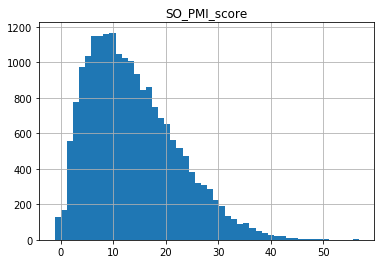

In [30]:
dftrain.hist('SO_PMI_score', bins = 50)
#plt.savefig('VADER_train.png',bbox_inches="tight")
plt.show()

In [31]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

In [32]:
x = dftrain[['SO_PMI_score']].values.astype(float)

In [33]:
#SOPMI_scaled = min_max_scaler().fit_transform(x)
SOPMI_scaled = preprocessing.minmax_scale(dftrain[['SO_PMI_score']].values.astype(float), feature_range=(-1, 1))

In [34]:
dftrain['SO_PMI_scaled'] = SOPMI_scaled

In [35]:
dftrain['polarity'].replace(to_replace=[4],value=1,inplace=True)

In [36]:
dftrain.head()

text_no_tag  polarity  \
235076   @USER i have a guinea pig too ! i do not even ...         0   
1274244                               @USER happy birthday         1   
820212   twitter fam wat up , had a great time shoppin ...         1   
1490408  watching jimmy kimmel live ' s nba special , s...         1   
374153   bedd . wish i could curl up in someone special...         0   

         SO_PMI_score  SO_PMI_scaled  
235076      22.492881      -0.184918  
1274244      5.027200      -0.787531  
820212      19.979527      -0.271635  
1490408     35.584079       0.266764  
374153      17.071806      -0.371959

In [37]:
dftrain['SO_PMI_scaled'].min()

-1.0

In [38]:
dftrain.describe()

polarity  SO_PMI_score  SO_PMI_scaled
count  20000.000000  20000.000000   20000.000000
mean       0.501800     13.783999      -0.485398
std        0.500009      8.455650       0.291743
min        0.000000     -1.130838      -1.000000
25%        0.000000      7.221877      -0.711809
50%        1.000000     12.423272      -0.532346
75%        1.000000     19.092008      -0.302257
max        1.000000     56.835624       1.000000

In [39]:
dftrain['SO_PMI_sentiment'] = dftrain['SO_PMI_scaled'].apply(lambda x: 0 if x<0 else 1)

In [40]:
dftrain.head()

text_no_tag  polarity  \
235076   @USER i have a guinea pig too ! i do not even ...         0   
1274244                               @USER happy birthday         1   
820212   twitter fam wat up , had a great time shoppin ...         1   
1490408  watching jimmy kimmel live ' s nba special , s...         1   
374153   bedd . wish i could curl up in someone special...         0   

         SO_PMI_score  SO_PMI_scaled  SO_PMI_sentiment  
235076      22.492881      -0.184918                 0  
1274244      5.027200      -0.787531                 0  
820212      19.979527      -0.271635                 0  
1490408     35.584079       0.266764                 1  
374153      17.071806      -0.371959                 0

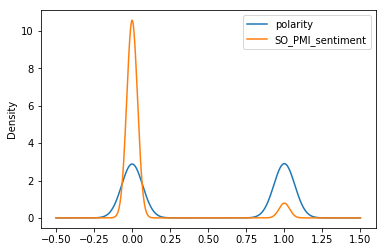

In [50]:
dftrain[['polarity','SO_PMI_sentiment']].plot.kde()
#plt.savefig('VADER_Polarity.png',bbox_inches="tight")
plt.show()

In [42]:
dftrain.to_csv('SO_PMI_sentiment.csv')

In [43]:
print("gold negative tweets:", len(dftrain[dftrain['polarity']==0]))
print("gold positive tweets:", len(dftrain[dftrain['polarity']==1]))
print("SO_PMI_sentiment negative tweets:", len(dftrain[dftrain['SO_PMI_sentiment']==0]))
print("SO_PMI_sentiment positive tweets:", len(dftrain[dftrain['SO_PMI_sentiment']==1]))


gold negative tweets: 9964
gold positive tweets: 10036
SO_PMI_sentiment negative tweets: 18607
SO_PMI_sentiment positive tweets: 1393


In [44]:
scores_train = dftrain['SO_PMI_scaled'].tolist()



In [45]:
y_train = dftrain['polarity'].tolist()

In [46]:
list(zip(scores_train,y_train))

[(-0.18491769705168604, 0),
 (-0.7875310121177566, 1),
 (-0.2716352260299848, 1),
 (0.26676410751145396, 1),
 (-0.3719594863654031, 0),
 (-0.795888303686429, 1),
 (-0.10390382226824046, 0),
 (0.04786490885992345, 1),
 (-0.2684563286574627, 0),
 (-0.8429228556621411, 0),
 (-0.5343947815135102, 1),
 (-0.5342783797775106, 0),
 (-0.6603945654972835, 1),
 (-0.1291128047504122, 1),
 (-0.8038006598481404, 0),
 (-0.26337473839011616, 1),
 (-0.8068392731177424, 1),
 (-0.41233922053846894, 0),
 (-0.26999407536868125, 1),
 (-0.6140660174167636, 1),
 (-0.6247269914139385, 1),
 (-0.6068164270466736, 1),
 (-0.7659356670183085, 0),
 (-0.4048705128838612, 1),
 (-0.7019348894909536, 1),
 (-0.8862846978335591, 0),
 (-0.8573255492834517, 1),
 (0.09095732841704507, 0),
 (-0.38868523039776015, 0),
 (-0.8003666126274448, 1),
 (-0.4892626504924757, 0),
 (-0.2921271823036369, 1),
 (-0.1602730779561501, 0),
 (-0.4315059277837209, 0),
 (-0.6169675975233379, 0),
 (-0.8340468113199618, 0),
 (-0.85244343098253, 1)

In [47]:
accuracy = 0
for prediction,correct in zip(scores_train, y_train):
    if prediction>0 and correct==1 or prediction<=0 and correct==0:
        accuracy += 1
print(accuracy/len(scores_train))

0.49935
